# Housing Price Predictor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from FormatScripts import string

pd.options.display.max_columns = None
%matplotlib inline

## Functions used

In [2]:
def string(x):
    return str(x)

In [3]:
def add_unit(x):
    if x != 0:
        return ' ' + str(x)
    else:
        return ''

def lower(x):
    return x.lower()

def roound(x):
    if isinstance(x,str)==True:
        return x
    else:
        return round(x)

In [4]:
def abr_suf(x):
    if x == 'Street':
        return ' st'
    elif x == 'Avenue':
        return ' ave'
    elif x == 'Boulevard':
        return ' blvd'
    elif x == 'Drive':
        return ' dr'
    elif x == 'Way':
        return ' wy'
    elif x == 'Place' or x == 'place':
        return ' pl'
    elif x == 'Lane':
        return ' ln'
    elif x == 'Court':
        return ' ct'
    elif x == 'Parkway':
        return ' pkwy'
    elif x == 'Road':
        return ' rd'
    else:
        return ''

In [5]:
def prop_type_update(x):
    if x == 'Loft' or x == 'Commercial/Residential' or x == 'Duplex':
        return 'Single Family Residence'
    else:
        return x
        

In [6]:
def yn_impute(x):
    if x == True:
        return 1
    else:
        return 0
    
def impute_features(df, feature_list):
    for feature in feature_list:
        df[feature] = df[feature].apply(yn_impute)

In [7]:
def wall_clean(x):
    if x == 'No Common Walls' or x == 'End Unit' or x == 'End Unit, No Common Walls' or x == 'No Common Walls, End Unit':
        return 1
    else:
        return 0

### Read-in CSV for Title Data

In [7]:
df_santa_monica = pd.read_csv('Santa Monica.csv')

df_venice = pd.read_csv('Venice.csv')

df_playavista = pd.read_csv('Playa Vista.csv')

df_mdr = pd.read_csv('Marina Del Rey.csv')

In [8]:
df = pd.concat([df_santa_monica,df_venice,df_playavista,df_mdr],ignore_index=True)

In [9]:
df.shape

(39652, 48)

In [10]:
df['Site Address Zip'].unique()

array([90402, 90403, 90401, 90405, 90404, 90292, 90291, 90094])

### clean data only pull house sales from the past 3 years

In [11]:
def string(x):
    return str(x)

In [12]:
df['Sale Date']= df['Sale Date'].apply(string)
df['Sale Year'] = df['Sale Date'].apply(lambda x: x[-4:])

In [13]:
# df = df[(df['Sale Year']=='2015') | (df['Sale Year']=='2016') | (df['Sale Year']=='2017') | 
#         (df['Sale Year']=='2018') | (df['Sale Year']=='2019')].reset_index()

In [14]:
df.shape

(39652, 49)

In [16]:
df = df[['Parcel Number', 'Site Address', 'Site Address Unit Number', 'Site Address City', 
        'Year Built', 'Bedrooms',
         'Bathrooms', 'Sale Date',
        'Sales Price', 'Prior Sale Date', 'Lot Area SQFT','Owner Occupied']]

In [17]:
df['Site Address'].dropna(inplace=True)

In [18]:
df['Site Address Unit Number'].fillna(0,inplace=True)

In [19]:
df['Site Address Unit Number'] = df['Site Address Unit Number'].apply(lambda x: roound(x))

In [20]:
df.head(3)

,Parcel Number,Site Address,Site Address Unit Number,Site Address City,Year Built,Bedrooms,Bathrooms,Sale Date,Sales Price,Prior Sale Date,Lot Area SQFT,Owner Occupied
0,2205-028-004,449 14Th St,0,Santa Monica,NaN,NaN,NaN,09/19/2008,NaN,01/21/1969,3091.0,Y
1,3009-009-003,1158 26Th St,210,Santa Monica,NaN,NaN,NaN,10/31/1997,12000.0,NaN,8524.0,Y
2,3027-010-033,837 18Th St,6,Santa Monica,NaN,NaN,NaN,05/12/2016,540003.0,05/02/2014,46304.0,Y


In [21]:
df['addy'] = df['Site Address'] + df['Site Address Unit Number'].apply(add_unit)

In [22]:
df.addy.dropna(inplace=True)

In [23]:
df.addy = df.addy.apply(lower)

In [24]:
df.addy.sample(10)

29978             700 main st 24
29714           1221 preston way
23497          445 howland canal
39603    4337 marina city dr 945
26387         825 california ave
14049            1501 pearl st 1
23236                40 29th ave
26109            810 indiana ave
1853        1544 1/2 stanford st
19190            1040 4th st 108
Name: addy, dtype: object

# MLS DATA

In [175]:
full_list = []
for i in range(1,101):
    x = pd.read_csv('Full ({}).csv'.format(i))
    full_list.append(x)

In [176]:
MLS = pd.concat(full_list,ignore_index=True)

In [178]:
MLS.to_csv('housing.csv')

In [179]:
!pwd

/Users/esotewic/Downloads


In [98]:
MLS.head()

,AccessibilityFeatures,AccountingType,LotSizeAcres,AdNumber,AdditionalDimensions,AdvertisingExpense,PrivateRemarks,Amperage,AnchorsCoTenants,Appliances,AppliancesYN,MLSAreaMajor,Assessments,AssessmentsYN,ParcelNumber,AssetClass,LeaseAssignableYN,AssociationAmenities,AssociationFee,AssociationFeeFrequency,AssociationFee2,AssociationFee2Frequency,AssociationName,AssociationName2,AssociationManagementName,AssociationManagementName2,AssociationPhone,AssociationPhoneExt,AssociationPhone2,AssociationPhone2Ext,AssociationYN,PropertyAttachedYN,AutoSoldYN,BelowGradeFinishedArea,BathroomsTotalInteger,BathroomsFull,BathroomsFullAndThreeQuarter,BathroomsHalf,BathroomsOneQuarter,BathroomsThreeQuarter,BedroomsTotal,TaxBlock,BuilderName,BuilderName.1,SubdivisionName,SubdivisionNameOther,BuildingExpenses,BuildingFeatures,BuildingName,BuildingStatus,BusinessName,BusinessType,BusinessURL,CableTvExpense,CapRate,CashiersCheck,CDOMResetYN,City,ClearanceHeightMax,ClearanceHeightMin,Cleared,CoListAgentAOR,CoListAgentBrokerKeyNumeric,CoListAgentMobilePhone,CoListAgentBrokerMlsId,CoListAgentDirectPhone,CoListAgentDirectPhoneExt,CoListAgentEmail,CoListAgentFax,CoListAgentFirstName,CoListAgentHomePhone,CoListAgentHomePhoneExt,CoListAgentKeyNumeric,CoListAgentLastName,CoListAgentMainOfficeKeyNumeric,CoListAgentMainOfficeMlsId,CoListAgentMlsId,CoListAgentPager,CoListAgentStateLicense,CoListAgentTollFreePhone,CoListAgentTollFreePhoneExt,CoListAgentVoiceMail,CoListAgentVoiceMailExt,CoListOfficeAOR,CoListOfficeFax,CoListOfficeKeyNumeric,CoListOfficeMlsId,CoListOfficeName,CoListOfficePhone,CoListOfficePhoneExt,CoListOfficeStateLicense,SpecialLicenses,CommonInterest,CommonWalls,CommunityFeatures,TaxTract,ConcessionsAmount,ConcessionsComments,CondoArea,CondoAreaUnits,ConstructionMaterials,ContactOrder1,ContactOrder2,ContactOrder3,ContactOrder4,ContactOrder5,ContactOrder6,Contingency,Cooling,CoolingYN,CoBuyerAgentAOR,CoBuyerAgentBrokerKeyNumeric,CoBuyerAgentBrokerMlsId,CoBuyerAgentFirstName,CoBuyerAgentKeyNumeric,CoBuyerAgentLastName,CoBuyerAgentMainOfficeKeyNumeric,CoBuyerAgentMainOfficeMlsId,CoBuyerAgentMlsId,CoBuyerAgentStateLicense,CoBuyerOfficeAOR,CoBuyerOfficeKeyNumeric,CoBuyerOfficeMlsId,CoBuyerOfficeName,CoBuyerOfficeStateLicense,Country,CountyOrParish,CreditAmount,CreditCheckPaidBy,CreditCheckYN,CumulativeDaysOnMarket,CurrentGeologicalYN,CurrentPrice,CurrentUse,AutoSoldDate,BackOnMarketDate,CancelationDate,CloseDate,EndingDate,HoldActivationDate,LandLeaseExpirationDate,LandLeaseRenewalDate,LeaseExpiration,PurchaseContractDate,ListingContractDate,ExpirationDate,HoldDate,WithdrawnDate,OffMarketDate,OnMarketDate,ContractStatusChangeDate,StatusPriceChangeTimestamp,DaysOnMarket,DeletedYN,DepositKey,DepositOther,DepositPets,DepositSecurity,DirectionFaces,Disclosures,DistanceToBusComments,DistanceToElectricComments,DistanceToFreewayComments,DistanceToGasComments,DistanceToPhoneServiceComments,DistanceToPlaceofWorshipComments,DistanceToSchoolsComments,DistanceToSewerComments,DistanceToShoppingComments,DistanceToStreetComments,DistanceToWaterComments,DivisibleSQFT,DocumentNumber,DOH1,DOH2,DOH3,DoorFeatures,DualVariableCompensationYN,EatingArea,EffectiveGross,Electric,ElectricExpense,Elevation,EntryLevel,EntryLocation,EquipmentExpense,EquipmentValue,ExpenseYear,ExteriorFeatures,FenceYN,Fencing,FinancialInfoAsOf,FinancialRemarks,BuyerFinancing,FireplaceYN,FireplaceFeatures,FirstRepairs,Flooring,FoundationDetails,NumberOfFullTimeEmployees,Furnished,FurnitureReplacementExpense,AttachedGarageYN,GarageIncome,GarageRentalRate,GardenerExpense,GarageSpaces,FuelExpense,GreenEnergyEfficient,GreenEnergyGeneration,GreenIndoorAirQuality,GreenLocation,GreenPropertyCount,GreenSustainability,GreenWaterConservation,GrossEquity,GrossIncome,GrossMultiplier,GrossOperatingIncome,GrossScheduledIncome,GrossSpendableIncome,Have,Heating,HeatingYN,HighTechFlexSquareFootage,HoursOwnerWorks,Improvements,ImprovementsAmount,ImprovementsPercent,OtherIncomeDescription,IndustrialSquareFootage,In

In [99]:
MLS[MLS.ClosePrice==16100000.0]

,AccessibilityFeatures,AccountingType,LotSizeAcres,AdNumber,AdditionalDimensions,AdvertisingExpense,PrivateRemarks,Amperage,AnchorsCoTenants,Appliances,AppliancesYN,MLSAreaMajor,Assessments,AssessmentsYN,ParcelNumber,AssetClass,LeaseAssignableYN,AssociationAmenities,AssociationFee,AssociationFeeFrequency,AssociationFee2,AssociationFee2Frequency,AssociationName,AssociationName2,AssociationManagementName,AssociationManagementName2,AssociationPhone,AssociationPhoneExt,AssociationPhone2,AssociationPhone2Ext,AssociationYN,PropertyAttachedYN,AutoSoldYN,BelowGradeFinishedArea,BathroomsTotalInteger,BathroomsFull,BathroomsFullAndThreeQuarter,BathroomsHalf,BathroomsOneQuarter,BathroomsThreeQuarter,BedroomsTotal,TaxBlock,BuilderName,BuilderName.1,SubdivisionName,SubdivisionNameOther,BuildingExpenses,BuildingFeatures,BuildingName,BuildingStatus,BusinessName,BusinessType,BusinessURL,CableTvExpense,CapRate,CashiersCheck,CDOMResetYN,City,ClearanceHeightMax,ClearanceHeightMin,Cleared,CoListAgentAOR,CoListAgentBrokerKeyNumeric,CoListAgentMobilePhone,CoListAgentBrokerMlsId,CoListAgentDirectPhone,CoListAgentDirectPhoneExt,CoListAgentEmail,CoListAgentFax,CoListAgentFirstName,CoListAgentHomePhone,CoListAgentHomePhoneExt,CoListAgentKeyNumeric,CoListAgentLastName,CoListAgentMainOfficeKeyNumeric,CoListAgentMainOfficeMlsId,CoListAgentMlsId,CoListAgentPager,CoListAgentStateLicense,CoListAgentTollFreePhone,CoListAgentTollFreePhoneExt,CoListAgentVoiceMail,CoListAgentVoiceMailExt,CoListOfficeAOR,CoListOfficeFax,CoListOfficeKeyNumeric,CoListOfficeMlsId,CoListOfficeName,CoListOfficePhone,CoListOfficePhoneExt,CoListOfficeStateLicense,SpecialLicenses,CommonInterest,CommonWalls,CommunityFeatures,TaxTract,ConcessionsAmount,ConcessionsComments,CondoArea,CondoAreaUnits,ConstructionMaterials,ContactOrder1,ContactOrder2,ContactOrder3,ContactOrder4,ContactOrder5,ContactOrder6,Contingency,Cooling,CoolingYN,CoBuyerAgentAOR,CoBuyerAgentBrokerKeyNumeric,CoBuyerAgentBrokerMlsId,CoBuyerAgentFirstName,CoBuyerAgentKeyNumeric,CoBuyerAgentLastName,CoBuyerAgentMainOfficeKeyNumeric,CoBuyerAgentMainOfficeMlsId,CoBuyerAgentMlsId,CoBuyerAgentStateLicense,CoBuyerOfficeAOR,CoBuyerOfficeKeyNumeric,CoBuyerOfficeMlsId,CoBuyerOfficeName,CoBuyerOfficeStateLicense,Country,CountyOrParish,CreditAmount,CreditCheckPaidBy,CreditCheckYN,CumulativeDaysOnMarket,CurrentGeologicalYN,CurrentPrice,CurrentUse,AutoSoldDate,BackOnMarketDate,CancelationDate,CloseDate,EndingDate,HoldActivationDate,LandLeaseExpirationDate,LandLeaseRenewalDate,LeaseExpiration,PurchaseContractDate,ListingContractDate,ExpirationDate,HoldDate,WithdrawnDate,OffMarketDate,OnMarketDate,ContractStatusChangeDate,StatusPriceChangeTimestamp,DaysOnMarket,DeletedYN,DepositKey,DepositOther,DepositPets,DepositSecurity,DirectionFaces,Disclosures,DistanceToBusComments,DistanceToElectricComments,DistanceToFreewayComments,DistanceToGasComments,DistanceToPhoneServiceComments,DistanceToPlaceofWorshipComments,DistanceToSchoolsComments,DistanceToSewerComments,DistanceToShoppingComments,DistanceToStreetComments,DistanceToWaterComments,DivisibleSQFT,DocumentNumber,DOH1,DOH2,DOH3,DoorFeatures,DualVariableCompensationYN,EatingArea,EffectiveGross,Electric,ElectricExpense,Elevation,EntryLevel,EntryLocation,EquipmentExpense,EquipmentValue,ExpenseYear,ExteriorFeatures,FenceYN,Fencing,FinancialInfoAsOf,FinancialRemarks,BuyerFinancing,FireplaceYN,FireplaceFeatures,FirstRepairs,Flooring,FoundationDetails,NumberOfFullTimeEmployees,Furnished,FurnitureReplacementExpense,AttachedGarageYN,GarageIncome,GarageRentalRate,GardenerExpense,GarageSpaces,FuelExpense,GreenEnergyEfficient,GreenEnergyGeneration,GreenIndoorAirQuality,GreenLocation,GreenPropertyCount,GreenSustainability,GreenWaterConservation,GrossEquity,GrossIncome,GrossMultiplier,GrossOperatingIncome,GrossScheduledIncome,GrossSpendableIncome,Have,Heating,HeatingYN,HighTechFlexSquareFootage,HoursOwnerWorks,Improvements,ImprovementsAmount,ImprovementsPercent,OtherIncomeDescription,IndustrialSquareFootage,In

In [100]:
MLS = MLS[['ClosePrice','ParcelNumber','LotSizeAcres','PrivateRemarks',
           'PublicRemarks','Appliances',
                'AppliancesYN','MLSAreaMajor',
           'AssociationAmenities',
               'AssociationFee','BathroomsTotalInteger','BathroomsFull',
               'BedroomsTotal','City', 'CommonWalls','Cooling','CoolingYN',
               'CountyOrParish','CumulativeDaysOnMarket','CurrentPrice',
                'FireplaceYN','HeatingYN','Latitude','Longitude','LaundryYN','OriginalListPrice',
                'LotSizeSquareFeet','ParkingTotal', 'NumberOfUnitsTotal','OccupantType',
                'OnMarketTimestamp','OpenHouseCount','ParkingYN','PatioYN','PoolPrivateYN',
                'PricePerSquareFoot','PropertyType','PropertySubType','RoomType',
                'BuyerAgencyCompensation','UnitNumber','LivingArea','StateOrProvince',
                'StoriesTotal','StreetName','StreetNumberNumeric','StreetSuffix',
                'SyndicationRemarks','ViewYN','YearBuilt','PostalCode','Zoning',
               'StandardStatus','CloseDate']]


MLS.UnitNumber.fillna(0,inplace=True)

## Pull Recent Sale Data Only

In [101]:
MLS['addy'] = MLS['StreetNumberNumeric'].apply(lambda x: str(x)) + ' ' + MLS.StreetName.apply(lower) + MLS.StreetSuffix.apply(abr_suf) + MLS.UnitNumber.apply(add_unit)

In [102]:
MLS.addy.sample(10)

5968                1024 chelsea ave
33300    13075 pacific promenade 315
19189            139 union jack mall
3348                   2320 oak st 5
34944                   651 bundy dr
11444               348 sycamore ave
31518              12601 stanwood pl
14389                     549 9th st
25895                 2902 ocean ave
38516               2537 federal ave
Name: addy, dtype: object

In [103]:
MLS.shape

(43091, 55)

# Merge Datasets

In [104]:
merge = MLS

In [105]:
# merge = MLS.merge(df, on='addy', copy=False)

# merge.drop_duplicates(subset='addy', keep='first', inplace=True)

In [106]:
merge.shape

(43091, 55)

In [107]:
merge.columns

Index(['ClosePrice', 'ParcelNumber', 'LotSizeAcres', 'PrivateRemarks',
       'PublicRemarks', 'Appliances', 'AppliancesYN', 'MLSAreaMajor',
       'AssociationAmenities', 'AssociationFee', 'BathroomsTotalInteger',
       'BathroomsFull', 'BedroomsTotal', 'City', 'CommonWalls', 'Cooling',
       'CoolingYN', 'CountyOrParish', 'CumulativeDaysOnMarket', 'CurrentPrice',
       'FireplaceYN', 'HeatingYN', 'Latitude', 'Longitude', 'LaundryYN',
       'OriginalListPrice', 'LotSizeSquareFeet', 'ParkingTotal',
       'NumberOfUnitsTotal', 'OccupantType', 'OnMarketTimestamp',
       'OpenHouseCount', 'ParkingYN', 'PatioYN', 'PoolPrivateYN',
       'PricePerSquareFoot', 'PropertyType', 'PropertySubType', 'RoomType',
       'BuyerAgencyCompensation', 'UnitNumber', 'LivingArea',
       'StateOrProvince', 'StoriesTotal', 'StreetName', 'StreetNumberNumeric',
       'StreetSuffix', 'SyndicationRemarks', 'ViewYN', 'YearBuilt',
       'PostalCode', 'Zoning', 'StandardStatus', 'CloseDate', 'addy'],
    

In [174]:

sorted(merge.PostalCode.unique())


[90025,
 90034,
 90035,
 90049,
 90064,
 90066,
 90067,
 90077,
 90094,
 90210,
 90211,
 90212,
 90230,
 90232,
 90272,
 90291,
 90292,
 90293,
 90401,
 90402,
 90403,
 90404,
 90405]

In [109]:
merge.shape

(43091, 55)

# Prepping Data For Modeling

In [110]:
daddy = merge
master = daddy[['addy','City','PostalCode',
                'ClosePrice','CloseDate',
                'CurrentPrice', 
                'YearBuilt','LivingArea', 
                'BedroomsTotal','BathroomsTotalInteger',
                'LotSizeAcres','LotSizeSquareFeet',
                'Latitude','Longitude', 
                'StoriesTotal', 
                'PropertyType',
                'PropertySubType','RoomType',

                'AppliancesYN','CoolingYN', 'FireplaceYN', 
                'HeatingYN','LaundryYN','ParkingYN',
                'PatioYN', 'PoolPrivateYN','CommonWalls'
]]

In [111]:
# daddy = merge
# master = daddy[['addy','City','PostalCode', 'Owner Occupied',
#                  'Sales Price', 'Sale Date','CloseDate','Prior Sale Date',
#                  'CurrentPrice', 
#                  'YearBuilt',
#                  'Bedrooms','Bathrooms','BedroomsTotal','BathroomsTotalInteger',
#                  'Lot Area SQFT','LotSizeAcres','LotSizeSquareFeet',
#                  'AppliancesYN','CoolingYN', 'FireplaceYN', 
#                  'HeatingYN','LaundryYN','ParkingYN',
#                  'PatioYN', 'PoolPrivateYN', 'PropertyType',
#                  'CommonWalls',
#                  'Latitude','Longitude', 
#                  'PropertySubType','RoomType','LivingArea', 
#                  'StoriesTotal', 
#                  'Close Month','Close Year']]

In [112]:
master[master.ClosePrice==16100000.0]

,addy,City,PostalCode,ClosePrice,CloseDate,CurrentPrice,YearBuilt,LivingArea,BedroomsTotal,BathroomsTotalInteger,LotSizeAcres,LotSizeSquareFeet,Latitude,Longitude,StoriesTotal,PropertyType,PropertySubType,RoomType,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,CommonWalls
10781,2121 la mesa dr,Santa Monica,90402,16100000.0,11/18/2016 12:00:00 AM,16100000.0,1981.0,9288.0,6.0,7.0,0.5253,22881.0,34.045932,-118.497904,2.0,Residential,Single Family Residence,"Great Room, Walk-In Closet, Retreat, See Remar...",True,True,True,True,True,True,True,True,NaN


In [113]:
master.shape

(43091, 27)

# Get Dummies
+ Property Type

In [114]:
master.PropertySubType = master.PropertySubType.apply(prop_type_update)
prop_type_df = pd.get_dummies(master.PropertySubType)
master = pd.concat([master,prop_type_df],axis=1)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [115]:
master = master[['ClosePrice','YearBuilt', 
                 'BedroomsTotal','BathroomsTotalInteger', 
                 'Latitude','Longitude',
                 'LivingArea','StoriesTotal',
                 'LotSizeSquareFeet',
                 'CloseDate','CommonWalls',
                 'Single Family Residence', 'Condominium', 'Townhouse',
                'AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                 'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN']]

In [116]:
master.shape

(43091, 22)

## Impute Missing Values

In [117]:
master.CommonWalls = master.CommonWalls.map(wall_clean)

In [118]:
master.CommonWalls.value_counts()

0    25681
1    17410
Name: CommonWalls, dtype: int64

In [119]:
col_list = ['AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
                 'LaundryYN','ParkingYN','PatioYN', 'PoolPrivateYN','CommonWalls']

impute_features(master, col_list)

In [120]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43091 entries, 0 to 43090
Data columns (total 22 columns):
ClosePrice                 32920 non-null float64
YearBuilt                  42031 non-null float64
BedroomsTotal              43087 non-null float64
BathroomsTotalInteger      43070 non-null float64
Latitude                   43090 non-null float64
Longitude                  43090 non-null float64
LivingArea                 40769 non-null float64
StoriesTotal               32812 non-null float64
LotSizeSquareFeet          31353 non-null float64
CloseDate                  32902 non-null object
CommonWalls                43091 non-null int64
Single Family Residence    43091 non-null uint8
Condominium                43091 non-null uint8
Townhouse                  43091 non-null uint8
AppliancesYN               43091 non-null int64
CoolingYN                  43091 non-null int64
FireplaceYN                43091 non-null int64
HeatingYN                  43091 non-null int64
LaundryY

In [121]:
master.StoriesTotal.fillna(1, inplace=True)
master.StoriesTotal.replace(0,1, inplace=True)
master.LivingArea.fillna(master.LivingArea.mean(), inplace=True)
master.LivingArea.replace(0,master.LivingArea.mean(), inplace=True)
master['LotSizeSquareFeet'].fillna(master['LotSizeSquareFeet'].mean(), inplace=True)
master['LotSizeSquareFeet'].replace(0,master['LotSizeSquareFeet'].mean(), inplace=True)

master.BathroomsTotalInteger.fillna(master.BathroomsTotalInteger.mean(), inplace=True)
master.BathroomsTotalInteger.replace(0,master.BathroomsTotalInteger.mean(), inplace=True)

master.BedroomsTotal.fillna(master.BedroomsTotal.mean(), inplace=True)
master.BedroomsTotal.replace(0,master.BedroomsTotal.mean(), inplace=True)
master['YearBuilt'].fillna(master['YearBuilt'].mean(), inplace=True)
master['YearBuilt'].replace(0,master['YearBuilt'].mean(), inplace=True)

## Feature Engineering

In [122]:
master['Age'] = 2020 - master['YearBuilt']
master['CloseMonth']=pd.to_datetime(master.CloseDate).dt.month
master['CloseYear']=pd.to_datetime(master.CloseDate).dt.year

In [123]:
master.shape

(43091, 25)

In [124]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43091 entries, 0 to 43090
Data columns (total 25 columns):
ClosePrice                 32920 non-null float64
YearBuilt                  43091 non-null float64
BedroomsTotal              43091 non-null float64
BathroomsTotalInteger      43091 non-null float64
Latitude                   43090 non-null float64
Longitude                  43090 non-null float64
LivingArea                 43091 non-null float64
StoriesTotal               43091 non-null float64
LotSizeSquareFeet          43091 non-null float64
CloseDate                  32902 non-null object
CommonWalls                43091 non-null int64
Single Family Residence    43091 non-null uint8
Condominium                43091 non-null uint8
Townhouse                  43091 non-null uint8
AppliancesYN               43091 non-null int64
CoolingYN                  43091 non-null int64
FireplaceYN                43091 non-null int64
HeatingYN                  43091 non-null int64
LaundryY

## Remove Old Sale Data

In [125]:
master=master[master['CloseYear']>2015]

In [126]:
master.ClosePrice.shape

(16975,)

In [127]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16975 entries, 0 to 43090
Data columns (total 25 columns):
ClosePrice                 16975 non-null float64
YearBuilt                  16975 non-null float64
BedroomsTotal              16975 non-null float64
BathroomsTotalInteger      16975 non-null float64
Latitude                   16975 non-null float64
Longitude                  16975 non-null float64
LivingArea                 16975 non-null float64
StoriesTotal               16975 non-null float64
LotSizeSquareFeet          16975 non-null float64
CloseDate                  16975 non-null object
CommonWalls                16975 non-null int64
Single Family Residence    16975 non-null uint8
Condominium                16975 non-null uint8
Townhouse                  16975 non-null uint8
AppliancesYN               16975 non-null int64
CoolingYN                  16975 non-null int64
FireplaceYN                16975 non-null int64
HeatingYN                  16975 non-null int64
LaundryY

In [128]:
master.Age.sample(20)

33197    14.0
35171    12.0
23786    95.0
32808    80.0
40316    31.0
37590    90.0
39865    91.0
40626    73.0
31424    48.0
41842     4.0
35380    30.0
10559     3.0
10576    83.0
32561    39.0
42624    63.0
33124     5.0
6079     47.0
6362     38.0
33111     3.0
10531    72.0
Name: Age, dtype: float64

In [129]:
master.shape

(16975, 25)

## Remove Outliers

In [130]:
master = master[(master['ClosePrice'] > 400000) & (master['ClosePrice']<20000000) & (master['StoriesTotal']<=4)]
master = master[master['Latitude'] > 0]
master = master[master['YearBuilt'] > 0]
master = master[master['BedroomsTotal'] > 0]
master = master[master['BedroomsTotal'] < 10]
master = master[master['BathroomsTotalInteger'] > 0]
master = master[master['BathroomsTotalInteger'] < 16]

## Add 10 Year Bond Market Price

In [131]:
bond_prices = pd.read_csv('DGS10.csv')
bond_prices.DGS10 = bond_prices.DGS10.replace('.','1.77')
bond_dic = dict(zip(bond_prices.DATE, bond_prices.DGS10))
master['Bond10Year'] = pd.to_datetime(master.CloseDate).astype(str)
master['Bond10Year'] = master['Bond10Year'].map(bond_dic)
master['Bond10Year'] = master['Bond10Year'].apply(float)
master['Bond10Year'] = master['Bond10Year'].fillna(np.mean(master.Bond10Year))

In [132]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16090 entries, 0 to 43089
Data columns (total 26 columns):
ClosePrice                 16090 non-null float64
YearBuilt                  16090 non-null float64
BedroomsTotal              16090 non-null float64
BathroomsTotalInteger      16090 non-null float64
Latitude                   16090 non-null float64
Longitude                  16090 non-null float64
LivingArea                 16090 non-null float64
StoriesTotal               16090 non-null float64
LotSizeSquareFeet          16090 non-null float64
CloseDate                  16090 non-null object
CommonWalls                16090 non-null int64
Single Family Residence    16090 non-null uint8
Condominium                16090 non-null uint8
Townhouse                  16090 non-null uint8
AppliancesYN               16090 non-null int64
CoolingYN                  16090 non-null int64
FireplaceYN                16090 non-null int64
HeatingYN                  16090 non-null int64
LaundryY

In [133]:
master.describe()

,ClosePrice,YearBuilt,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CommonWalls,Single Family Residence,Condominium,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,Age,CloseMonth,CloseYear,Bond10Year
count,1.609000e+04,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,1.609000e+04,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000,16090.000000
mean,2.017022e+06,1970.059129,3.011001,3.007097,34.029073,-118.444784,2216.602106,1.678185,4.351343e+04,0.492853,0.587632,0.329086,0.082660,0.835923,0.662772,0.778372,0.942822,0.915289,0.870727,0.378123,0.264077,49.940871,6.447234,2017.346053,2.297698
std,2.020398e+06,27.466364,1.218516,1.589404,0.039247,0.042049,1506.414305,0.894165,1.011266e+05,0.499964,0.492276,0.469896,0.275376,0.370357,0.472778,0.415355,0.232190,0.278460,0.335512,0.484934,0.440854,27.466364,3.147005,1.078069,0.466917
min,4.020000e+05,1887.000000,1.000000,1.000000,33.775247,-118.574561,264.000000,1.000000,9.000000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,1.370000
25%,9.300000e+05,1948.000000,2.000000,2.000000,33.996608,-118.469435,1310.000000,1.000000,6.083000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,29.000000,4.000000,2016.000000,1.870000
50%,1.385000e+06,1970.000000,3.000000,3.000000,34.031142,-118.438403,1780.000000,1.000000,9.769000e+03,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,6.000000,2017.000000,2.320000
75%,2.260000e+06,1991.000000,4.000000,4.000000,34.052634,-118.415111,2598.000000,2.000000,3.560375e+04,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,9.000000,2018.000000,2.657500
max,1.985000e+07,2019.000000,9.000000,15.000000,34.138444,-118.179776,23398.000000,4.000000,1.110527e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,133.000000,12.000000,2019.000000,3.240000


# EDA

In [134]:
# sns.pairplot(master)

In [135]:
sorted(master.ClosePrice,reverse=True)

[19850000.0,
 19715787.0,
 19660000.0,
 19650000.0,
 19500000.0,
 19500000.0,
 19375000.0,
 19250000.0,
 19000000.0,
 19000000.0,
 18500000.0,
 18400000.0,
 18100000.0,
 18000000.0,
 18000000.0,
 17990000.0,
 17800000.0,
 17765000.0,
 17750000.0,
 17285000.0,
 17150000.0,
 17126000.0,
 17086000.0,
 17085000.0,
 17000000.0,
 16825000.0,
 16780000.0,
 16700000.0,
 16550000.0,
 16500000.0,
 16500000.0,
 16475000.0,
 16300000.0,
 16300000.0,
 16200000.0,
 16200000.0,
 16162500.0,
 16100000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 16000000.0,
 15955000.0,
 15940000.0,
 15800000.0,
 15700000.0,
 15600000.0,
 15600000.0,
 15550000.0,
 15500000.0,
 15500000.0,
 15500000.0,
 15450000.0,
 15430000.0,
 15300000.0,
 15275000.0,
 15210000.0,
 15200000.0,
 15025000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 15000000.0,
 14980000.0,
 14900000.0,
 14850000.0,
 14812500.0,
 14750000.0,
 14600000.0,
 14600000.0,
 14600000.0,
 14600000.0,
 14500000.0,
 14500000.0,

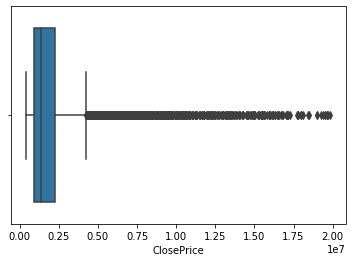

In [136]:
sns.boxplot(master['ClosePrice'])

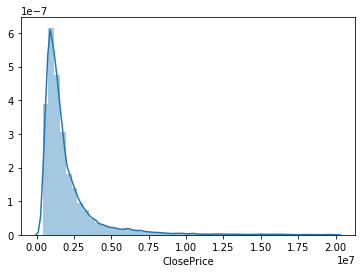

In [137]:
sns.distplot((master['ClosePrice']))

## Compute the pairwise correlation

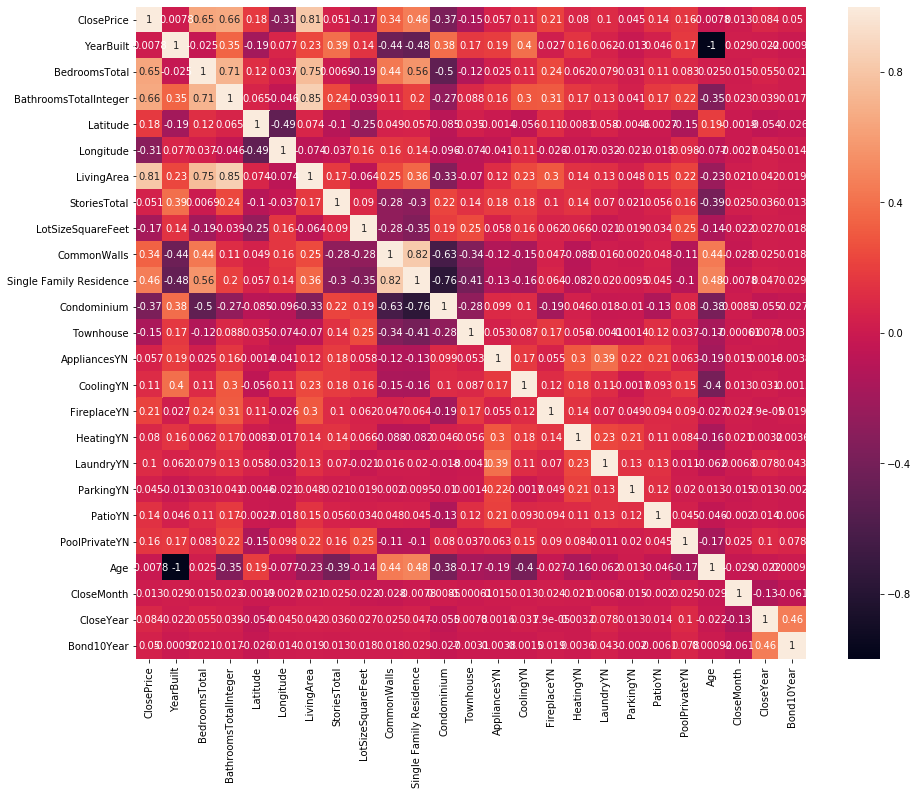

In [60]:
fig, ax = plt.subplots(figsize=(15,12))
sns.heatmap(master.corr(),annot=True)

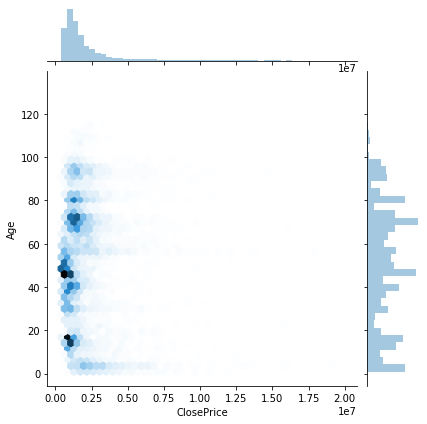

In [138]:
sns.jointplot(data=master, x='ClosePrice' , y = 'Age', kind='hex')

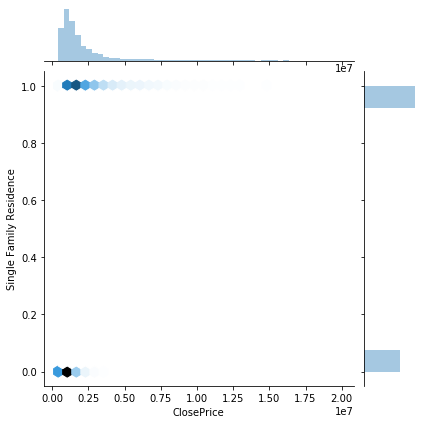

In [139]:
sns.jointplot(data=master, x='ClosePrice' , y = 'Single Family Residence', kind='hex')

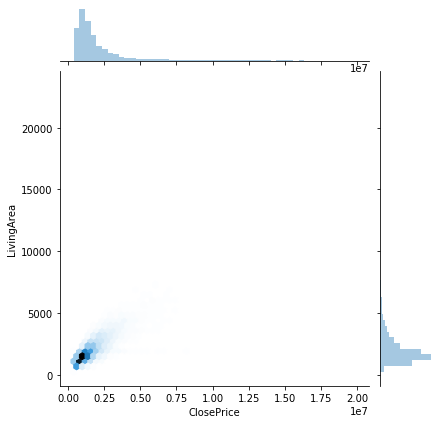

In [140]:
sns.jointplot(data=master, x='ClosePrice' , y = 'LivingArea', kind='hex')

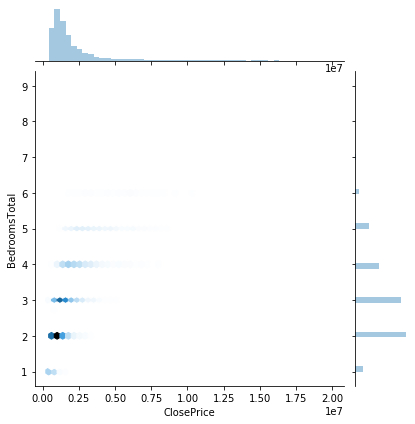

In [141]:
sns.jointplot(data=master, x='ClosePrice' , y = 'BedroomsTotal', kind='hex')

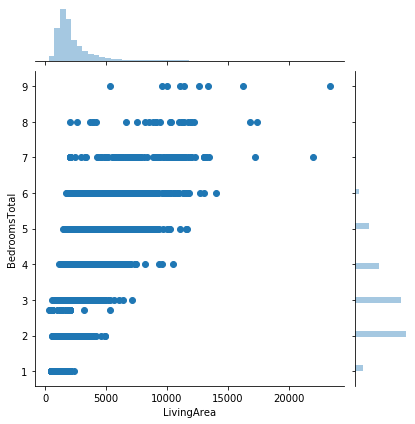

In [142]:
sns.jointplot(data=master, x='LivingArea' , y = 'BedroomsTotal')

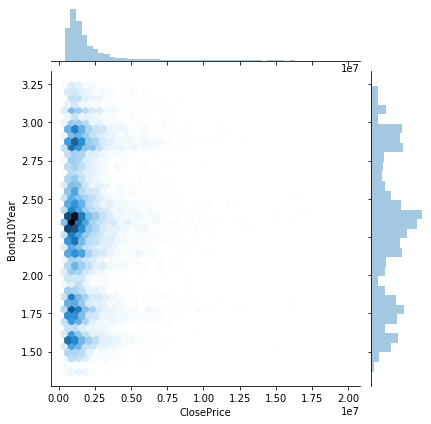

In [143]:
# Bond10Year
sns.jointplot(data=master, x='ClosePrice' , y = 'Bond10Year', kind='hex')

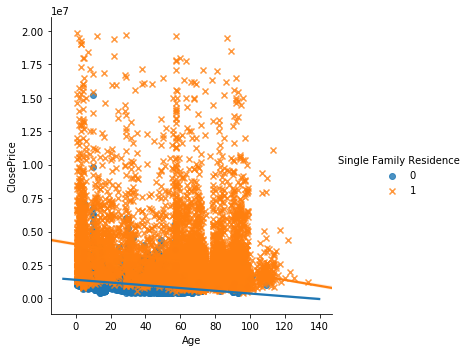

In [161]:
sns.lmplot(data=master, x='Age', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"]);

In [68]:
master.describe()

,ClosePrice,YearBuilt,BedroomsTotal,BathroomsTotalInteger,Latitude,Longitude,LivingArea,StoriesTotal,LotSizeSquareFeet,CommonWalls,Single Family Residence,Condominium,Townhouse,AppliancesYN,CoolingYN,FireplaceYN,HeatingYN,LaundryYN,ParkingYN,PatioYN,PoolPrivateYN,Age,CloseMonth,CloseYear,Bond10Year
count,5.970000e+03,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.00000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000,5970.000000
mean,1.682248e+06,1971.256857,2.769341,2.679895,34.006271,-118.456146,1859.773641,1.715075,33443.454678,0.474372,0.523618,0.346064,0.129983,0.840536,0.583920,0.706533,0.932831,0.90134,0.872529,0.371022,0.170352,48.743143,6.457286,2017.304355,2.289426
std,1.173505e+06,29.445893,1.045157,1.244193,0.022816,0.026494,993.024907,0.921472,76457.846512,0.499385,0.499484,0.475754,0.336313,0.366139,0.492948,0.455389,0.250336,0.29823,0.333527,0.483119,0.375973,29.445893,3.172159,1.068753,0.464441
min,4.020000e+05,1897.000000,1.000000,1.000000,33.966839,-118.518234,378.000000,1.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,2016.000000,1.370000
25%,9.602500e+05,1948.000000,2.000000,2.000000,33.987615,-118.475765,1248.250000,1.000000,5568.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,17.000000,4.000000,2016.000000,1.860000
50%,1.350500e+06,1972.000000,3.000000,3.000000,34.003432,-118.454335,1612.000000,1.000000,7507.500000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000,48.000000,6.000000,2017.000000,2.320000
75%,1.950000e+06,2003.000000,3.000000,3.000000,34.025966,-118.434272,2119.750000,2.000000,29670.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.000000,72.000000,9.000000,2018.000000,2.620000
max,1.610000e+07,2019.000000,9.000000,11.000000,34.117666,-118.179776,9753.000000,4.000000,552170.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,123.000000,12.000000,2019.000000,3.240000


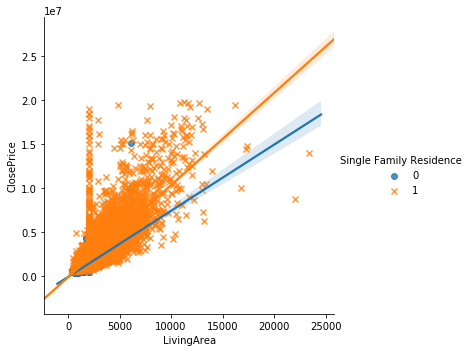

In [160]:
sns.lmplot(data=master, x='LivingArea', y = 'ClosePrice', 
           hue = 'Single Family Residence', markers=["o", "x"]);

In [70]:
master['ClosePrice'].describe()

count    5.970000e+03
mean     1.682248e+06
std      1.173505e+06
min      4.020000e+05
25%      9.602500e+05
50%      1.350500e+06
75%      1.950000e+06
max      1.610000e+07
Name: ClosePrice, dtype: float64

In [71]:
master.columns

Index(['ClosePrice', 'YearBuilt', 'BedroomsTotal', 'BathroomsTotalInteger',
       'Latitude', 'Longitude', 'LivingArea', 'StoriesTotal',
       'LotSizeSquareFeet', 'CloseDate', 'CommonWalls',
       'Single Family Residence', 'Condominium', 'Townhouse', 'AppliancesYN',
       'CoolingYN', 'FireplaceYN', 'HeatingYN', 'LaundryYN', 'ParkingYN',
       'PatioYN', 'PoolPrivateYN', 'Age', 'CloseMonth', 'CloseYear',
       'Bond10Year'],
      dtype='object')

# Modeling

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [73]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

In [74]:
from sklearn.ensemble import (GradientBoostingRegressor, 
                              GradientBoostingClassifier, 
                              AdaBoostClassifier,
                              RandomForestClassifier)
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble.partial_dependence import plot_partial_dependence
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import textwrap # for wrapping answer descriptions
# from individual_soln import * # use functions from individual_soln.py

## Train Test Split

In [144]:
models = master
y = models['ClosePrice']
X = models[['Age','LotSizeSquareFeet',
            'Single Family Residence', 'Condominium', 'Townhouse',
            'BedroomsTotal','BathroomsTotalInteger'
            ,'Latitude','Longitude'
            ,'LivingArea','StoriesTotal'
            ,'CloseMonth','CloseYear', 
             'AppliancesYN','CoolingYN', 'FireplaceYN','HeatingYN',
            'PoolPrivateYN','CommonWalls','Bond10Year']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=69)

# Linear Regression

In [145]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print(lm.intercept_)
print(metrics.explained_variance_score(y_test,predictions)) #R2 score
pd.DataFrame(lm.coef_, X.columns, columns=['Coeff']) #Coefficients DF

-516158325.65750915
0.6997088045722795


,Coeff
Age,8.796855e+03
LotSizeSquareFeet,-8.384836e-01
Single Family Residence,4.344563e+05
Condominium,3.128150e+05
Townhouse,1.732749e+04
BedroomsTotal,-1.724359e+05
BathroomsTotalInteger,3.894230e+05
Latitude,5.261294e+05
Longitude,-3.454179e+06
LivingArea,7.976052e+02


### Loss Functions

In [146]:
print(metrics.mean_absolute_error(y_test, predictions))
print(metrics.mean_squared_error(y_test, predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

582287.5213961271
1189332546264.8518
1090565.2416361214


### Predictions

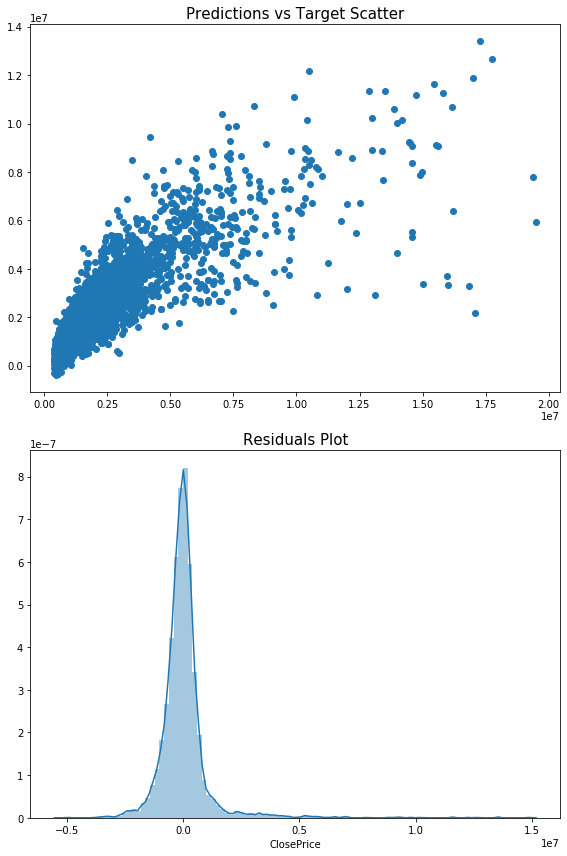

In [147]:
fig, axs = plt.subplots(2,1,figsize=(8,12))
axs[0].scatter(y_test,predictions)
axs[0].set_title('Predictions vs Target Scatter', size=15)
axs[1]=sns.distplot(y_test-predictions, bins = 100)
axs[1].set_title('Residuals Plot', size=15)
plt.tight_layout()

# Ridge Regression & Lasso

In [148]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
# from utils import XyScaler

In [149]:
ridge_r = Ridge(alpha=0.1)
ridge_r.fit(X_train, y_train)
ridge_pred = ridge_r.predict(X_test)
print(ridge_r.score(X_test,y_test))
print(mean_squared_error(y_test,ridge_pred))
print(np.sqrt(mean_squared_error(y_test,ridge_pred)))

0.6996994276600866
1189336264789.514
1090566.9464959563


In [150]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
lasso.score(X_test,y_test)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6968177968921920.0, tolerance: 4655160679358.939
  positive)


0.6996971382396746

In [151]:
# standardizer = StandardScaler()
# standardizer.fit(X_train.values, y_train.values)
# X_train_std, y_train_std = standardizer.transform(X_train, y_train)
# X_test_std, y_test_std = standardizer.transform(X_test, y_test)
# final_ridge = Ridge().fit(X_train_std, y_train_std)
# final_lasso = Lasso().fit(X_train_std, y_train_std)

# Random Forest Regressor Model

In [152]:
rfr = RandomForestRegressor(n_estimators=100, max_features=3)
rfr.fit(X_train,y_train)
rfr_predictions = rfr.predict(X_test)

print(rfr.score(X_test,y_test)) 
print(rfr.feature_importances_) #Feature Importances
print(r2_score(y_test,rfr_predictions))

0.8350129617751223
[0.03909923 0.07917779 0.03064027 0.02562103 0.00228659 0.12412914
 0.18040907 0.06560483 0.05990483 0.27256997 0.0121833  0.01808476
 0.00975916 0.00396233 0.00483431 0.00392038 0.00208668 0.02983849
 0.01101026 0.02487758]
0.8350129617751223


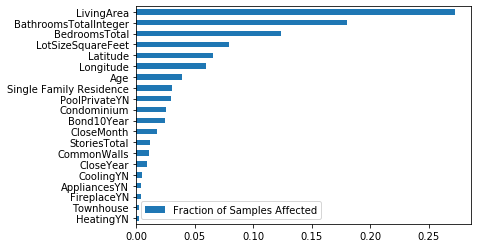

In [153]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : rfr.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

# Gradient Boosting

In [154]:
GBR = GradientBoostingRegressor(learning_rate=0.15, 
                                  n_estimators=2000, 
                                  max_depth=3)

GBR.fit(X_train, y_train)
GBR_predict = GBR.predict(X_test)

print(r2_score(y_test, GBR_predict))
print(GBR.score(X_test,y_test))

0.8627837203372739
0.8627837203372739


In [87]:
GBR.feature_importances_

array([2.28740489e-02, 3.57951923e-02, 4.58915314e-02, 3.36958780e-04,
       3.39188801e-04, 6.74542123e-03, 5.58509585e-02, 3.30693844e-02,
       1.99805633e-01, 5.77607817e-01, 1.23794474e-03, 2.09428102e-03,
       4.46506537e-03, 1.14691636e-03, 5.87965946e-04, 2.07945213e-04,
       7.61975288e-04, 6.42184119e-03, 4.95513245e-04, 4.26441739e-03])

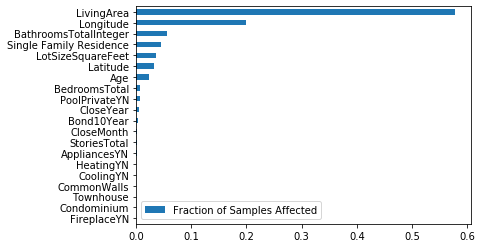

In [88]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : GBR.feature_importances_},
                           index=X.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')

In [89]:
param_grid = {
'n_estimators': [800,1500],
'max_features': [20,15],
'max_depth': [8,10],
'learning_rate': [0.1],
'subsample': [1]
}
classifier = GridSearchCV(estimator=GBR, cv=10, param_grid=param_grid, n_jobs=1)


In [90]:
classifier.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.15,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=2000,
                                                 n_iter_no_change=None,
             

In [91]:
print('Best Params:')
print(classifier.best_params_)
print('Best CV Score:')
print(classifier.best_score_)

Best Params:
{'learning_rate': 0.1, 'max_depth': 8, 'max_features': 15, 'n_estimators': 1500, 'subsample': 1}
Best CV Score:
0.834151011863183


# XGBOOST

In [92]:
import xgboost as xgb

In [155]:
model = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

In [156]:
model.fit(X_train,y_train)
predict=model.predict(X_test)

model.score(X_test,y_test)

/Users/esotewic/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:39:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8575149193274769

In [95]:
from sklearn.model_selection import GridSearchCV